# Microéconomie 5
## TD8 : Optimum de Pareto et équilibre général en incertain

### Exercice 1 : Optimum de Pareto et risque

Il y a deux états de la nature $\{1, 2\}$ qui se réalisent chacun avec probabilité $\pi_1 = \pi_2 = \frac{1}{2}$. Les deux agents $A$ et $B$ ont les fonctions d'utilité $v^A(c) = \ln c$ et $v^B(c) = 2 \ln c$ respectivement.

Initialement, $A$ fait face à la loterie $G_1 = (800, 200; \frac{1}{2}, \frac{1}{2})$, tandis que $B$ fait face à la loterie $G_2 = (200, 800; \frac{1}{2}, \frac{1}{2})$.

Les resources totales en chaque bien contingent sont donc $\omega_1 = \omega_2 = 1000$.


In [1]:
vA <- function(x) log(x)
vB <- function(x) 2*log(x)

UA <- function(x1, x2) 1/2 * vA(x1) + 1/2 * vA(x2)
UB <- function(x1, x2) 1/2 * vB(x1) + 1/2 * vB(x2)

ωA <- c(800, 200)
ωB <- c(200, 800)

ω1 <- ωA[1] + ωB[1]
ω2 <- ωA[2] + ωB[2]


#### Question 1.

En appliquant la définition de l'espérance, on trouve facilement que $\mathbf E(G_1) = \mathbf E(G_2) = 500$.

#### Question 2.

Par définition de l'utilité espérée,

\begin{align}
    U^A(G_1) &= \tfrac{1}{2} \ln(800) + \tfrac{1}{2} \ln(200) \simeq \underline{5{,}99} \\
    U^B(G_2) &= \tfrac{1}{2} \times 2 \ln(200) + \tfrac{1}{2} \times 2 \ln(800) \simeq \underline{11{,}98}.
\end{align}

#### Question 3.

La condition de Borch s'écrit ici

\begin{equation}
    \frac{c_2^A}{c_1^A} = \frac{c_2^B}{c_1^B}.
\end{equation}

Cette égalité n'est pas vérifiée pour l'allocation (interne) donnée, puisque $\frac{c_2^A}{c_1^A} = \frac{1}{4} \neq 4 = \frac{c_2^B}{c_1^B}$. Ainsi cette allocation n'est pas Pareto-optimale. 

#### Question 4.

En utilisant la condition de Borch et les conditions de ressources, 

\begin{equation}
    \frac{c_2^A}{c_1^A} = \frac{c_2^B}{c_1^B} = \frac{\omega_2 - c_2^A}{\omega_1 - c_1^A} \iff \boxed{c_2^A = \frac{\omega_2}{\omega_1} c_1^A} \overset{\text{A.N.}}{=} c_1^A.
\end{equation}

#### Questions 5 et 6.

Représentons l'allocation initiale $I$, et la courbe des optima de Pareto (en violet).

Pour représenter le coeur de l'économie (en noir), on trace les courbes d'indifférence de $A$ (en bleu) et de $B$ (en orange) passant par $I$.

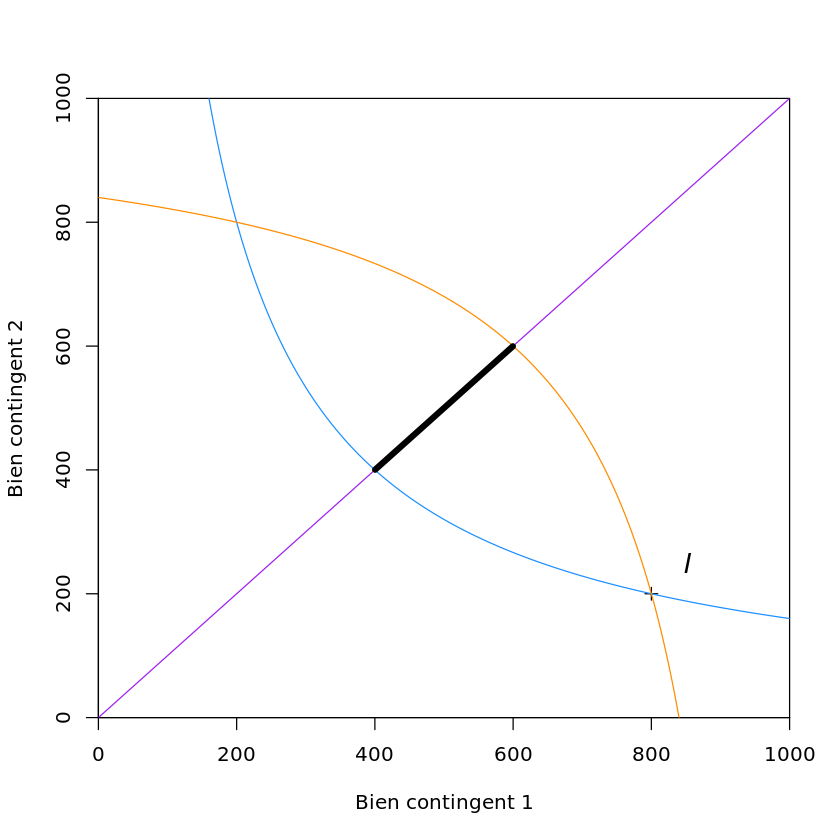

In [2]:
x1 <- seq(0, ω1, length=1000)                     # série de valeurs de x1 pour tracer les courbes

x2_opt <- function(x1) x1                                             # courbe des optima
I <- ωA                                                               # allocation initiale
indiffA <- function(U) exp(2*U) / x1                                  # courbe d'indifférence de A 
indiffB <- function(U) exp(U) / x1                                    # courbe d'indifférence de B
XA <- x1[ UA(x1, x2_opt(x1)) > UA(I[1], I[2]) ]                       # allocations acceptées par A
XB <- x1[ UB(ω1 - x1, ω2 - x2_opt(x1)) > UB(ω1 - I[1], ω2 - I[2]) ]   # allocations acceptées par B
XAB <- intersect(XA, XB)                                              # allocations acceptées par A et B

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien contingent 1", ylab="Bien contingent 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, x2_opt(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, ω2))      # courbe d'indifférence de A
lines(x1, rev(ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2]))), col = "darkorange", ylim = c(0, ω2)) # CI B
lines(XAB, x2_opt(XAB), col = "black", lwd = 5)                              # coeur de l'économie

#### Question 7.

On suppose maintenant $G_1 =(400, 600; \frac{1}{2}, \frac{1}{2})$ et $G_2 = (100, 900 ; \frac{1}{2}, \frac{1}{2})$, de telle sorte que les ressources totales sont $\omega_1 = 500$ et $\omega_2 = 1500$.

L'espérance des loteries est $\mathbf E(G_1) = \mathbf E(G_2) = 500$.

L'utilité espérée des agents est

\begin{align}
    U^A(G_1) &= \tfrac{1}{2} \ln(400) + \tfrac{1}{2} \ln(600) \simeq \underline{6{,}19} \\
    U^B(G_2) &= \tfrac{1}{2} \times 2 \ln(100) + \tfrac{1}{2} \times 2 \ln(900) \simeq \underline{11{,}41}.
\end{align}

La condition de Borch s'écrit toujours $\frac{c_2^A}{c_1^A} = \frac{c_2^B}{c_1^B}$, et elle n'est pas vérifiée, donc l'allocation donnée n'est toujours pas Pareto-optimale.

La courbe des optima s'obtient toujours par $c_2^A = \frac{\omega_2}{\omega_1} c_1^A \overset{\text{A.N.}}{=} 3 c_1^A$.

Représentons le graphe correspondant ci-dessous.

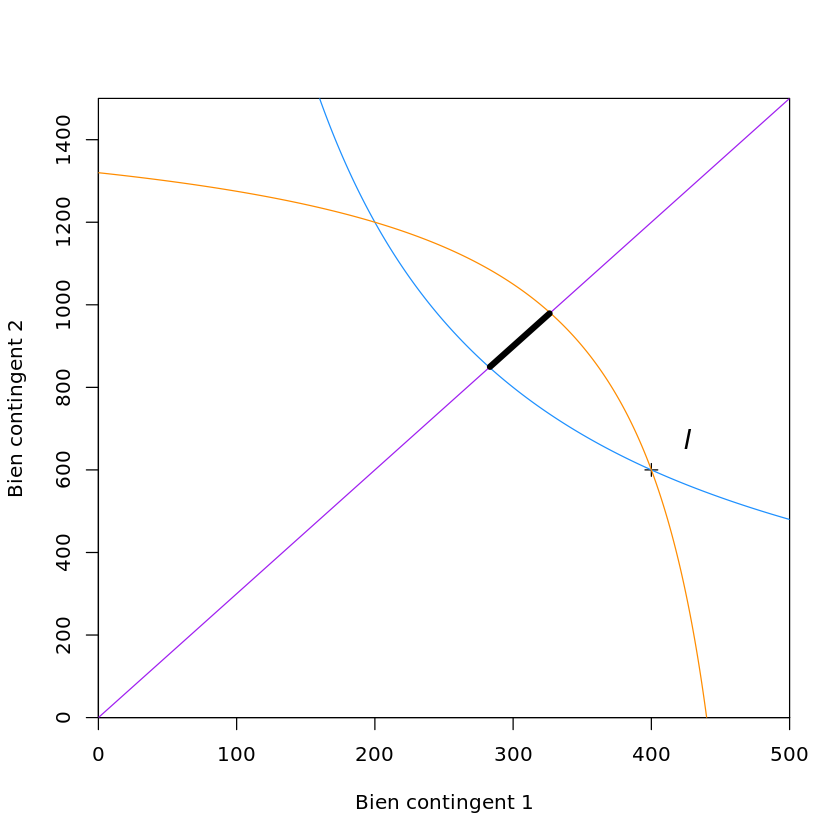

In [3]:
ωA <- c(400, 600)
ωB <- c(100, 900)

ω1 <- ωA[1] + ωB[1]
ω2 <- ωA[2] + ωB[2]

x1 <- seq(0, ω1, length=1000)                     # série de valeurs de x1 pour tracer les courbes

x2_opt <- function(x1) 3*x1                                           # courbe des optima
I <- ωA                                                               # allocation initiale
indiffA <- function(U) exp(2*U) / x1                                  # courbe d'indifférence de A 
indiffB <- function(U) exp(U) / x1                                    # courbe d'indifférence de B
XA <- x1[ UA(x1, x2_opt(x1)) > UA(I[1], I[2]) ]                       # allocations acceptées par A
XB <- x1[ UB(ω1 - x1, ω2 - x2_opt(x1)) > UB(ω1 - I[1], ω2 - I[2]) ]   # allocations acceptées par B
XAB <- intersect(XA, XB)                                              # allocations acceptées par A et B

plot(x = x1, y = x1, xlim = c(0, ω1), ylim = c(0, ω2),
     type = "n", asp=NA, xlab="Bien contingent 1", ylab="Bien contingent 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                  # point I
    text(I[1]+.05*ω1, I[2]+.05*ω2, labels = "I", cex = 1.3, font = 3)
lines(x1, x2_opt(x1), col = "purple", lwd = 1)                               # courbe des optima
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, ω2))      # courbe d'indifférence de A
lines(x1, rev(ω2 - indiffB(UB(ω1 - I[1], ω2 - I[2]))), col = "darkorange", ylim = c(0, ω2)) # CI B
lines(XAB, x2_opt(XAB), col = "black", lwd = 5)                              # coeur de l'économie